In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
pd.set_option('display.max_columns', 100)

In [186]:
#Read in the dataset loan_data.csv
#Medicare_Pres = pd.read_csv('Connecticut_Medicare_Part_D_Opioid_Prescriber_Summary_File_2014.csv')
#Opioid_treatment = pd.read_csv('Opioid_Related_Treatment_Admissions_by_Town_in_Department_of_Mental_Health_and_Addiction_Services_Programs.csv')
#Pharmacies = pd.read_csv('Pharmacies_offering_Narcan__Evzio_and_other_brands_of_Naloxone.csv')
#Overdose_Death = pd.read_csv('VSRR_Provisional_Drug_Overdose_Death_Counts copy.csv')
Death_CT =  pd.read_csv('Accidental_Drug_Related_Deaths_2012-2018.csv')

In [187]:
Death_CT.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,DeathCounty,Location,LocationifOther,DescriptionofInjury,InjuryPlace,InjuryCity,InjuryCounty,InjuryState,COD,OtherSignifican,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,06/28/2014 12:00:00 AM,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,substance,NaN,NaN,NaN,NaN,"Acute fent, hydrocod, benzodiazepine",NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,FAIRFIELD,Hospital,NaN,NaN,NaN,NaN,NaN,NaN,Cocaine Intoxication,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,NaN,Hospital,NaN,Substance Abuse,Unknown,UNKNOWN,NaN,NaN,Acute Heroin and Cocaine Intoxication,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,NaN,Hospital,NaN,substance abuse,Residence,RYE,NaN,NaN,Acute Fentanyl and Morphine Intoxication,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,FAIRFIELD,Hospital,NaN,Transdermal Absorption,Other,NaN,NaN,NaN,Fentanyl Intoxication,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


In [188]:
Death_CT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5105 non-null   object 
 1   Date                 5103 non-null   object 
 2   DateType             5103 non-null   object 
 3   Age                  5102 non-null   float64
 4   Sex                  5099 non-null   object 
 5   Race                 5092 non-null   object 
 6   ResidenceCity        4932 non-null   object 
 7   ResidenceCounty      4308 non-null   object 
 8   ResidenceState       3556 non-null   object 
 9   DeathCity            5100 non-null   object 
 10  DeathCounty          4005 non-null   object 
 11  Location             5081 non-null   object 
 12  LocationifOther      590 non-null    object 
 13  DescriptionofInjury  4325 non-null   object 
 14  InjuryPlace          5039 non-null   object 
 15  InjuryCity           3349 non-null   o

In [189]:
# apply dummy variable to binary values
Death_CT.iloc[:, 20:37] = Death_CT.iloc[:, 20:37].applymap(lambda x: 1 if x=='Y' else 0)

In [190]:
Death_CT.iloc[:, 20:37] = Death_CT.iloc[:, 20:37].astype(int)

In [191]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [192]:
Death_CT = DataFrameImputer().fit_transform(Death_CT)

In [193]:
Death_CT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5105 non-null   object 
 1   Date                 5105 non-null   object 
 2   DateType             5105 non-null   object 
 3   Age                  5105 non-null   float64
 4   Sex                  5105 non-null   object 
 5   Race                 5105 non-null   object 
 6   ResidenceCity        5105 non-null   object 
 7   ResidenceCounty      5105 non-null   object 
 8   ResidenceState       5105 non-null   object 
 9   DeathCity            5105 non-null   object 
 10  DeathCounty          5105 non-null   object 
 11  Location             5105 non-null   object 
 12  LocationifOther      5105 non-null   object 
 13  DescriptionofInjury  5105 non-null   object 
 14  InjuryPlace          5105 non-null   object 
 15  InjuryCity           5105 non-null   o

In [194]:
# convert the column to lowercase.
Death_CT['MannerofDeath'] = Death_CT['MannerofDeath'].str.lower()

In [196]:
Death_CT

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,DeathCounty,Location,LocationifOther,DescriptionofInjury,InjuryPlace,InjuryCity,InjuryCounty,InjuryState,COD,OtherSignifican,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,06/28/2014 12:00:00 AM,DateReported,41.964916,Male,White,HARTFORD,HARTFORD,CT,HARTFORD,HARTFORD,Residence,Friend's Residence,substance,Residence,HARTFORD,HARTFORD,CT,"Acute fent, hydrocod, benzodiazepine",Hypertensive and Atherosclerotic Cardiovascula...,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.000000,Male,Black,NORWALK,HARTFORD,CT,NORWALK,FAIRFIELD,Hospital,Friend's Residence,Substance Abuse,Residence,HARTFORD,HARTFORD,CT,Cocaine Intoxication,Hypertensive and Atherosclerotic Cardiovascula...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.000000,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,HARTFORD,Hospital,Friend's Residence,Substance Abuse,Unknown,UNKNOWN,HARTFORD,CT,Acute Heroin and Cocaine Intoxication,Hypertensive and Atherosclerotic Cardiovascula...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)","CT\n(41.575155, -72.738288)"
3,16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.000000,Male,White,RYE,WESTCHESTER,NY,GREENWICH,HARTFORD,Hospital,Friend's Residence,substance abuse,Residence,RYE,HARTFORD,CT,Acute Fentanyl and Morphine Intoxication,Hypertensive and Atherosclerotic Cardiovascula...,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,accident,"Greenwich, CT\n(41.026526, -73.628549)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)"
4,13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.000000,Male,"Asian, Other",FLUSHING,QUEENS,CT,GREENWICH,FAIRFIELD,Hospital,Friend's Residence,Transdermal Absorption,Other,HARTFORD,HARTFORD,CT,Fentanyl Intoxication,Hypertensive and Atherosclerotic Cardiovascula...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,accident,"Greenwich, CT\n(41.026526, -73.628549)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,15-0466,09/08/2015 12:00:00 AM,DateReported,43.000000,Male,White,CHESHIRE,NEW HAVEN,CT,CHESHIRE,NEW HAVEN,Residence,Friend's Residence,Substance Abuse,Residence,HARTFORD,HARTFORD,CT,Acute Intoxication due to the Combined Effects...,Hypertensive and Atherosclerotic Cardiovascula...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,accident,"CHESHIRE, CT\n(41.498834, -72.901448)","CHESHIRE, CT\n(41.498834, -72.901448)","CT\n(41.575155, -72.738288)"
5101,17-0618,07/22/2017 12:00:00 AM,DateReported,21.000000,Male,White,MADISON,NEW HAVEN,CT,NEW HAVEN,NEW HAVEN,Hospital,Friend's Residence,Drug Abuse,In Vehicle,HARTFORD,HARTFORD,CT,"Multidrug Toxicity Including Heroin, Alprazola...",Hypertensive and Atherosclerotic Cardiovascula...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,accident,"New Haven, CT\n(41.308252, -72.924161)","MADISON, CT\n(41.271447, -72.60086)","CT\n(41.575155, -72.738288)"
5102,18-0646,08/14/2018 12:00:00 AM,DateofDeath,30.000000,Male,White,LAWRENCEVILLE,TIOGA,PA,DANBURY,FAIRFIELD,Other,Friend's Residence,Drug abuse,Hotel or Motel,DANBURY,FAIRFIELD,CT,"Multidrug Toxicity Including Heroin, Fentanyl,...",Hypertensive and Atherosclerotic Cardiovascula...,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,accident,"DANBURY, CT\n(41.393666, -73.451539)","HARTFORD, CT\n(41.765775, -72.673356)","DANBURY, CT\n(41.393666, -73.451539)"
5103

In [195]:
Death_CT.describe(include='all')

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,DeathCounty,Location,LocationifOther,DescriptionofInjury,InjuryPlace,InjuryCity,InjuryCounty,InjuryState,COD,OtherSignifican,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
count,5105,5105,5105,5105.000000,5105,5105,5105,5105,5105,5105,5105,5105,5105,5105,5105,5105,5105,5105,5105,5105,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.0,5105.000000,5105.000000,5105,5105,5105,5105
unique,5105,2098,2,NaN,3,11,370,84,26,222,9,6,322,320,71,234,12,3,3193,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,374,289,226
top,15-0640,06/18/2017 12:00:00 AM,DateofDeath,NaN,Male,White,HARTFORD,HARTFORD,CT,HARTFORD,HARTFORD,Residence,Friend's Residence,Substance Abuse,Residence,HARTFORD,HARTFORD,CT,Acute Fentanyl Intoxication,Hypertensive and Atherosclerotic Cardiovascula...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,accident,"Hartford, CT\n(41.765775, -72.673356)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)"
freq,1,11,2824,NaN,3779,4017,469,2002,4991,568,2333,2701,4554,2398,3667,2038,3470,5100,168,4959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5090,379,389,1834
mean,NaN,NaN,NaN,41.964916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495397,0.297943,0.436435,0.076200,0.118903,0.021156,0.244270,0.023115,0.263075,0.092850,0.031146,0.025465,0.007444,0.004897,0.0,0.017238,0.481881,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,12.333013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500028,0.457399,0.495992,0.265344,0.323706,0.143917,0.429696,0.150282,0.440346,0.290251,0.173729,0.157549,0.085963,0.069815,0.0,0.130170,0.499721,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,NaN,NaN,NaN,NaN


In [119]:
Death_CT['COD'].value_counts()

Acute Fentanyl Intoxication                                                                             168
Multiple Drug Toxicity                                                                                  131
Heroin Intoxication                                                                                     130
Acute Heroin Intoxication                                                                               116
Heroin Toxicity                                                                                          95
                                                                                                       ... 
acute Cocaine, CV disease                                                                                 1
Combined Drug Toxicity, Cocaine and Opiate                                                                1
Acute Ethanol and Fentanyl Intoxication and Gastrointestinal Hemorrhage/Cirrhosis/Chronic Alcoholism      1
Complications of Acute Intox

<AxesSubplot:>

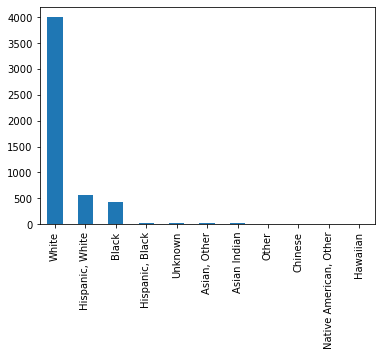

In [120]:
Death_CT['Race'].value_counts().plot(kind='bar')

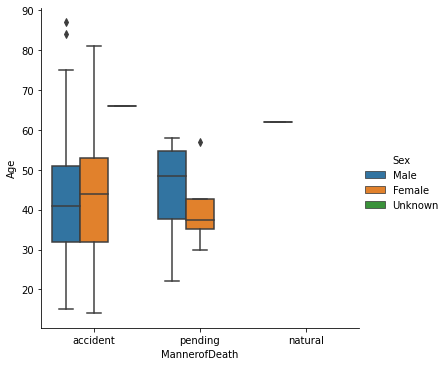

In [121]:
sns.catplot(x="MannerofDeath", y="Age", hue="Sex", kind="box", data=Death_CT)